# Define optimization method

In [1]:
# Create the path (PYTHONPATH) to modules, assuming that the 'amcess' directory is in the parent directory
import os
import sys
module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)

## Optimization of an analytical surface

To illustrate the functioning of the optimization methods, first, let's minimize a known analytical function. For example, the Himmelblau function, which features four local minima:

1. f(3, 2) = 0
2. f(-2.805118, 3.131312) = 0
3. f(-3.779310,-3.283186) = 0
4. f(3.584428, -1.848126) = 0

<img src="https://upload.wikimedia.org/wikipedia/commons/a/ad/Himmelblau_function.svg" style="height: 300px;"/> <img src="https://upload.wikimedia.org/wikipedia/commons/c/c4/Himmelblau_contour.svg" style="height: 300px;"/>

In the following, we'll show you the minimum input necessary to optimize this function with two different implementations.

## Dual annealing

## Gaussian Processes

We can also use the Gaussian Processes method, which is a Bayesian optimization approach. The minimal input of this technique includes only four parameters: 
- the function to be optimized,
- the bounds of the search space,
- the number of initial evaluations,
- the maximum number of iterations

A seed can be defined for reproducibility.

In [8]:
import numpy as np
import amcess
from amcess.minimization import solve_gaussian_processes
from amcess.miscelaneous import Himmelblau

# fix seed for reproducibility
iseed = 666
# define the cost function to be optimized (minimized)
cost_function = Himmelblau
# define the bound of the search space. the format list((min, max)) is a requirement
bounds = [(-5,5), (-5,5)]
# define the number of initial evaluations
initer = 20
# define the maximum number of evaluations
maxiter = 40
# define dictionary with gaussian process parameters
gp_params = {'initer': initer, 'maxiter': maxiter}
# solve the problem
opt = solve_gaussian_processes(func=cost_function,
                               bounds=bounds,
                               seed=iseed,
                               gp_params=gp_params)

The optimized values are given with the solution object "opt". For example, the configuration space point where the minimum was found, and its value are given by

In [9]:
# Print coordinates
print('x_min =', opt.x)
print('f_min =', opt.fun)

x_min = [-3.77937906 -3.2839423 ]
f_min = 2.4045703438507392e-05


In [10]:
# This solution corresponds to one of four local minima
print('f(' + ','.join([f'{x:.3f}' for x in opt.x]) + f') = {opt.fun:.6f}')

f(-3.779,-3.284) = 0.000024


For functions with dimensionality less or equal two, we can also plot the acquisition functions and the convergence of the optimization

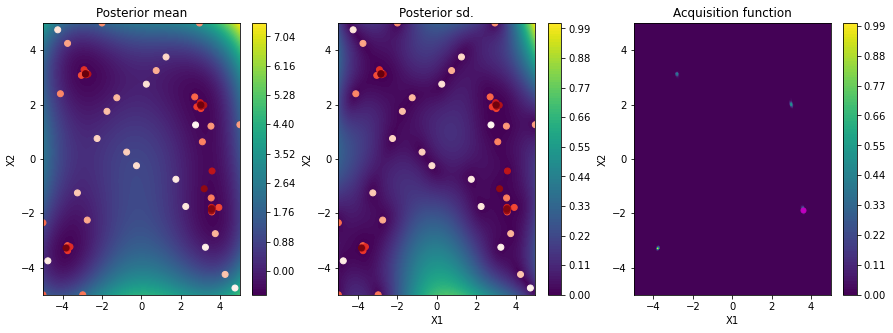

In [16]:
opt.plot_acquisition()

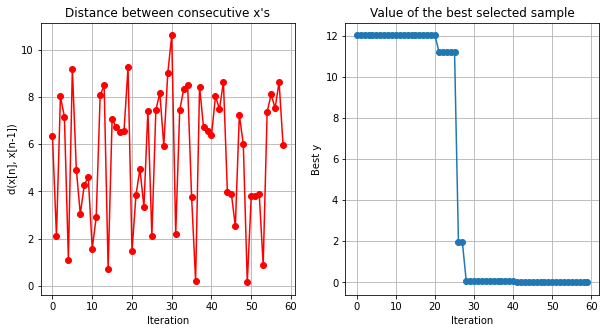

In [17]:
opt.plot_convergence()

We can also access all the points evaluated in the search space and its corresponding evaluations. Then, we can find all the local minima found by defining a threshold value

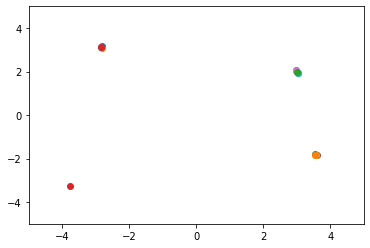

In [31]:
import matplotlib.pyplot as plt

x_evals = opt.X
y_evals = opt.Y
 
eps = 0.1
idx, dim = np.where(y_evals <= eps)
xmin = x_evals[idx]
ymin = y_evals[idx]

for xi in xmin:
    plt.scatter(xi[0], xi[1])
plt.ylim(-5,5)
plt.xlim(-5,5)
plt.show()

# Energy surface of a water cluster

In [ ]:
from amcess.base_molecule import Molecule, Cluster
from scipy.optimize import shgo
from pyscf import gto, scf